<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

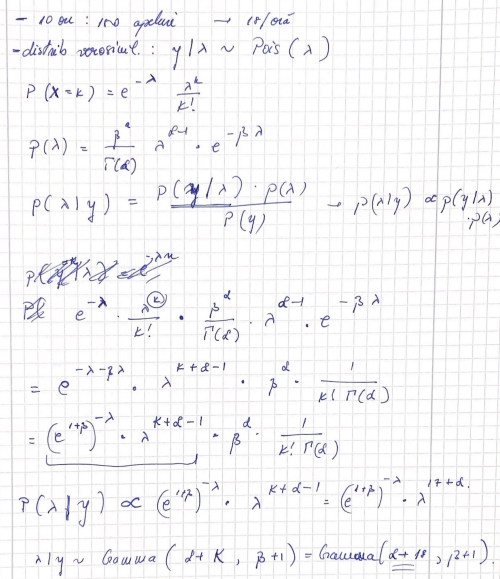

Most probable value (mode) for λ: 16.33
94% HDI for λ: [12.24, 21.09]


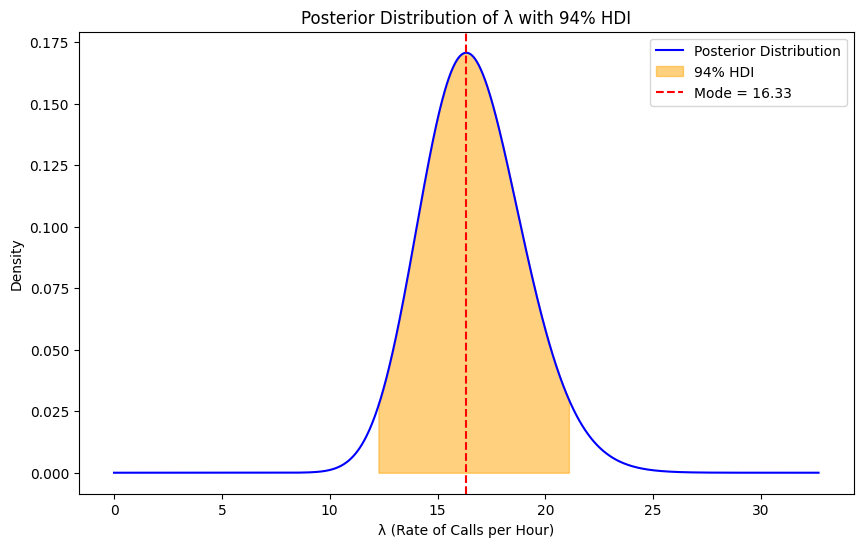

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import arviz as az

total_calls = 180
observation_time = 10
observed_rate = total_calls / observation_time

alpha_prior = 1
beta_prior = 1

alpha_post = alpha_prior + 18
beta_post = beta_prior + 1

mode_lambda = (alpha_post - 1) / beta_post if alpha_post > 1 else 0

print(f"Most probable value (mode) for λ: {mode_lambda:.2f}")

posterior_dist = gamma(a=alpha_post, scale=1/beta_post)
hdi_94 = az.hdi(posterior_dist.rvs(10000), hdi_prob=0.94)
print(f"94% HDI for λ: [{hdi_94[0]:.2f}, {hdi_94[1]:.2f}]")

lambda_values = np.linspace(0, 2 * mode_lambda, 1000)
posterior_pdf = posterior_dist.pdf(lambda_values)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label="Posterior Distribution", color="blue")
plt.fill_between(lambda_values, 0, posterior_pdf, where=(lambda_values >= hdi_94[0]) & (lambda_values <= hdi_94[1]),
                 color="orange", alpha=0.5, label="94% HDI")
plt.axvline(mode_lambda, color="red", linestyle="--", label=f"Mode = {mode_lambda:.2f}")
plt.xlabel("λ (Rate of Calls per Hour)")
plt.ylabel("Density")
plt.title("Posterior Distribution of λ with 94% HDI")
plt.legend()
plt.show()
